In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("data/APA-DDoS-Dataset.csv")

In [3]:
dataset

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [4]:
print(dataset.shape)

(151200, 23)


In [5]:
dataset.columns

Index(['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto',
       'frame.len', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.df', 'ip.flags.rb', 'tcp.seq',
       'tcp.ack', 'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')

In [6]:
## to capture any nan values in the dataset
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
if len(features_nan) !=0:
    for feature in features_nan:
        print("{} has: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)*100)) 
else :
    print("no such feature")

no such feature


In [7]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print("number of numerical variables ",len(numerical_features))

number of numerical variables  19


In [8]:
dataset[numerical_features].head()

,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,ip.flags.df,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
0,2412,8000,6,54,0,0,1,1,0,0,0,1,1,8,432,4,216,4,216
1,2413,8000,6,54,0,0,1,1,0,0,0,1,1,10,540,5,270,5,270
2,2414,8000,6,54,0,0,1,1,0,0,0,1,1,12,648,6,324,6,324
3,2415,8000,6,54,0,0,1,1,0,0,0,1,1,10,540,5,270,5,270
4,2416,8000,6,54,0,0,1,1,0,0,0,1,1,6,324,3,162,3,162


In [9]:
#values of some features has same value throughout the dataset and does not affect labels,so dropping them
dataset=dataset.drop(columns=["tcp.dstport","ip.proto","tcp.flags.syn","tcp.flags.reset","tcp.flags.ack","ip.flags.mf","ip.flags.rb","tcp.seq","tcp.ack","frame.time"])

In [10]:
dataset.columns

Index(['ip.src', 'ip.dst', 'tcp.srcport', 'frame.len', 'tcp.flags.push',
       'ip.flags.df', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')

In [11]:
dataset.tail()

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign
151199,192.168.19.1,192.168.23.2,37368,66,0,1,10,1146,6,560,4,586,Benign


In [12]:
label_dummy=pd.get_dummies(dataset['Label'])

In [13]:
dataset=pd.concat([dataset,label_dummy], axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
dataset['DDoS-PSH-ACK']=le.fit_transform(dataset['DDoS-PSH-ACK'])
dataset['Benign']=le.fit_transform(dataset['Benign'])
dataset['DDoS-ACK']=le.fit_transform(dataset['DDoS-ACK'])

In [17]:
dataset.tail()

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label,Benign,DDoS-ACK,DDoS-PSH-ACK
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign,1,0,0
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign,1,0,0
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign,1,0,0
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign,1,0,0
151199,192.168.19.1,192.168.23.2,37368,66,0,1,10,1146,6,560,4,586,Benign,1,0,0


In [18]:
feature_scale=[feature for feature in dataset.columns if feature not in ['ip.src','ip.dst','Benign','DDoS-ACK','DDoS-PSH-ACK','Label']]


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(dataset[feature_scale])

StandardScaler()

In [22]:
scaler.transform(dataset[feature_scale])

array([[-1.27146315, -0.63214064,  1.        , ..., -0.98567572,
        -0.03518717, -0.97784837],
       [-1.27141222, -0.63214064,  1.        , ..., -0.68097412,
         1.00312277, -0.70388293],
       [-1.27136129, -0.63214064,  1.        , ..., -0.37627252,
         2.0414327 , -0.4299175 ],
       ...,
       [ 0.50864024, -0.46366387, -1.        , ...,  0.95538634,
        -0.03518717,  0.88917535],
       [ 0.5087421 , -0.46366387, -1.        , ...,  0.95538634,
        -0.03518717,  1.0464518 ],
       [ 0.50884396, -0.46366387, -1.        , ...,  0.95538634,
        -0.03518717,  0.89932222]])

In [23]:
dataset.head()

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label,Benign,DDoS-ACK,DDoS-PSH-ACK
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS-PSH-ACK,0,0,1
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK,0,0,1
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS-PSH-ACK,0,0,1
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK,0,0,1
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS-PSH-ACK,0,0,1


In [24]:
dataset=pd.concat([dataset[['ip.src','ip.dst','Benign','DDoS-ACK','DDoS-PSH-ACK','Label']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],
               axis=1)

In [25]:
dataset.head()

,ip.src,ip.dst,Benign,DDoS-ACK,DDoS-PSH-ACK,Label,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
0,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271463,-0.632141,1.0,-1.0,-0.508386,-0.983051,-0.774686,-0.985676,-0.035187,-0.977848
1,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271412,-0.632141,1.0,-1.0,0.430752,-0.694094,-0.036029,-0.680974,1.003123,-0.703883
2,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271361,-0.632141,1.0,-1.0,1.369890,-0.405137,0.702627,-0.376273,2.041433,-0.429917
3,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271310,-0.632141,1.0,-1.0,0.430752,-0.694094,-0.036029,-0.680974,1.003123,-0.703883
4,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271259,-0.632141,1.0,-1.0,-1.447524,-1.272008,-1.513342,-1.290377,-1.073497,-1.251814


In [26]:
from sklearn.model_selection import train_test_split
rest_data, sampled_data = train_test_split(dataset, test_size=0.005, stratify=dataset['Label'], random_state=42)

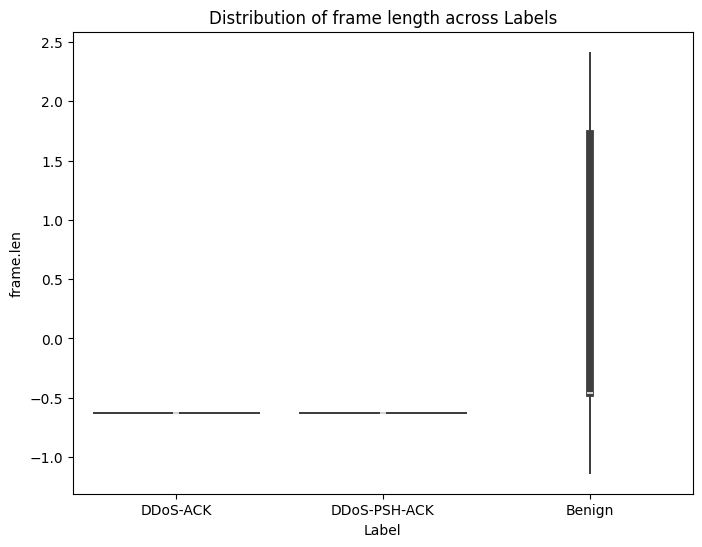

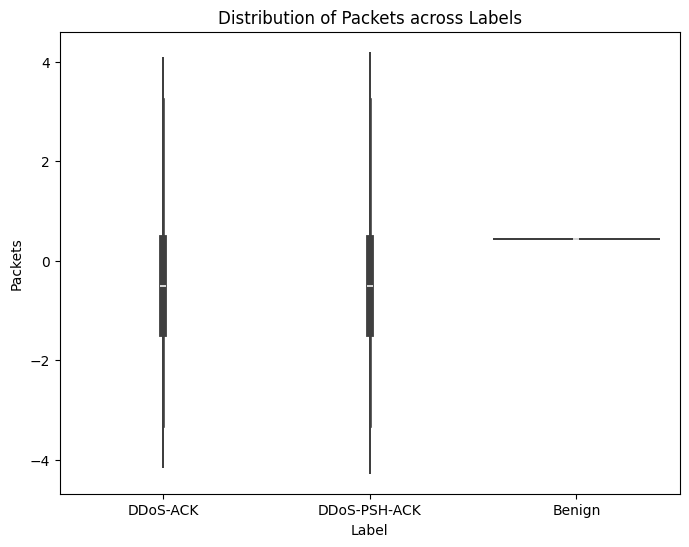

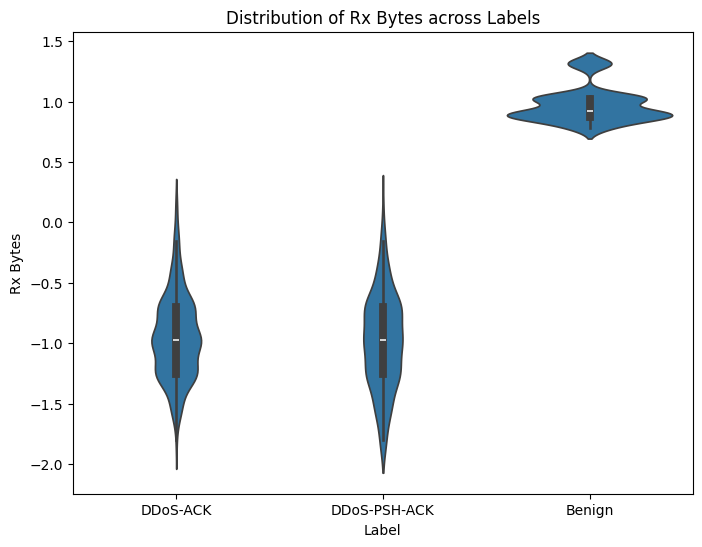

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(data= sampled_data, x='Label', y='frame.len')
plt.title('Distribution of frame length across Labels')
plt.xlabel('Label')
plt.ylabel('frame.len')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data= sampled_data, x='Label', y='Packets')
plt.title('Distribution of Packets across Labels')
plt.xlabel('Label')
plt.ylabel('Packets')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data= sampled_data,  x='Label', y='Rx Bytes')
plt.title('Distribution of Rx Bytes across Labels')
plt.xlabel('Label')
plt.ylabel('Rx Bytes')
plt.show()

In [28]:
dataset

,ip.src,ip.dst,Benign,DDoS-ACK,DDoS-PSH-ACK,Label,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
0,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271463,-0.632141,1.0,-1.0,-0.508386,-0.983051,-0.774686,-0.985676,-0.035187,-0.977848
1,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271412,-0.632141,1.0,-1.0,0.430752,-0.694094,-0.036029,-0.680974,1.003123,-0.703883
2,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271361,-0.632141,1.0,-1.0,1.369890,-0.405137,0.702627,-0.376273,2.041433,-0.429917
3,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271310,-0.632141,1.0,-1.0,0.430752,-0.694094,-0.036029,-0.680974,1.003123,-0.703883
4,192.168.1.1,192.168.23.2,0,0,1,DDoS-PSH-ACK,-1.271259,-0.632141,1.0,-1.0,-1.447524,-1.272008,-1.513342,-1.290377,-1.073497,-1.251814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,1,0,0,Benign,0.508437,-0.463664,-1.0,1.0,0.430752,0.927277,0.702627,0.955386,-0.035187,0.899322
151196,192.168.19.1,192.168.23.2,1,0,0,Benign,0.508538,-0.463664,-1.0,1.0,0.430752,0.940655,0.702627,0.955386,-0.035187,0.924689
151197,192.168.19.1,192.168.23.2,1,0,0,Benign,0.508640,-0.463664,-1.0,1.0,0.430752,0.921926,0.702627,0.955386,-0.035187,0.889175
151198,192.168.19.1,192.168.23.2,1,0,0,Benign,0.508742,-0.463664,-1.0,1.0,0.430752,1.004867,0.702627,0.955386,-0.035187,1.046452
